In [1]:
import numpy as np
import pandas as pd
import random 

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import seaborn as sns 

# Inicijalizacija podataka(tačaka):

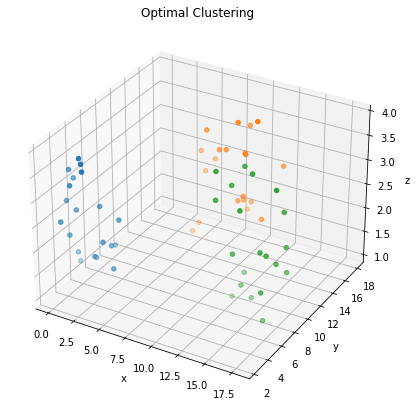

In [4]:
cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x3_start = 1
cluster1_x3_end = 4
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start
cluster1_x3 = np.random.random(size=(cluster1_num_samples))
cluster1_x3 = cluster1_x3 * (cluster1_x3_end - cluster1_x3_start) + cluster1_x3_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x3_start = 1
cluster2_x3_end = 4
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start
cluster2_x3 = np.random.random(size=(cluster2_num_samples))
cluster2_x3 = cluster2_x3 * (cluster2_x3_end - cluster2_x3_start) + cluster2_x3_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 6
cluster3_x2_end = 9
cluster3_x3_start = 1
cluster3_x3_end = 4
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start
cluster3_x3 = np.random.random(size=(cluster3_num_samples))
cluster3_x3 = cluster3_x3 * (cluster3_x3_end - cluster3_x3_start) + cluster3_x3_start

c1 = np.array([cluster1_x1, cluster1_x2, cluster1_x3]).T
c2 = np.array([cluster2_x1, cluster2_x2, cluster2_x3]).T
c3 = np.array([cluster3_x1, cluster3_x2, cluster3_x3]).T

# c1 = np.array([cluster1_x1, cluster1_x2]).T
# c2 = np.array([cluster2_x1, cluster2_x2]).T
# c3 = np.array([cluster3_x1, cluster3_x2]).T


data = np.concatenate((c1, c2, c3), axis=0)

#fig,ax=plt.subplots(figsize=(16,7))

#
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#
ax.scatter(cluster1_x1, cluster1_x2, cluster1_x3)
ax.scatter(cluster2_x1, cluster2_x2, cluster2_x3)
ax.scatter(cluster3_x1, cluster3_x2, cluster3_x3)

# plt.scatter(cluster1_x1, cluster1_x2)
# plt.scatter(cluster2_x1, cluster2_x2)
# plt.scatter(cluster3_x1, cluster3_x2)

plt.title("Optimal Clustering")
plt.show()

In [5]:
points0=data.tolist()
# za cuvanje random tacaka

# with open(r'savedInput1.txt', 'w') as fp:
#     for item in points0:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

#points0

# Ucitavanje podataka - wine.csv dataset:


In [6]:
# df=pd.read_csv('../bird.csv')
# X=df.dropna()
# y=X['type']
# X=X.drop(['id','type'],axis=1)
# klase=y.unique().tolist()
# X

In [7]:
df=pd.read_csv('wine-clustering.csv')
X=df.dropna()
X.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
# klase_encoded=pd.factorize(y)[0]
#klase_encoded

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
X_scaled=scaler.fit_transform(X)
points0=X_scaled.tolist()
#points0

# Reprezentacija jedinke:

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [14]:
class Individual:
    def __init__(self,points,num_clusters):
        #inicijalizujemo jedinke kao listu slucajnoodabranih tacaka duzine broja klastera:
        self.code=[points[random.randrange(len(points))] for _ in range(num_clusters)] 
        self.fitness = self.calcFitness(points,num_clusters)
        
#         self.fitness = self.calcFitnessSilueta(points)
#         self.fitness = self.calcFitnessDB(points)

        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
    
    def ed(self,a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        
        return dist
    #odredjuje kom klasteru pripada tacka point:
    def cluster_id(self,point,centers):
        d=float('inf')
        index=-1
        best_d=float('inf')
        
        for i,c in enumerate(centers):
            new_d=self.ed(point,c)
            if new_d<best_d:
                best_d=new_d
                index=i
   
        return index
        
    def sse_partial(self,points,cluster_index):
        #s=0
        sc=0
        
        for p in points:
            if self.cluster_id(p,self.code)==cluster_index:
                sc+=(self.ed(p,self.code[cluster_index]))**2
                #if p[-1]==cluster_index:
            
        return sc
    
    #SSE(Sum squared error)-metrika koju koristimo za racunanje fitness-a
    def sse(self,points,num_clusters):
        s=0
        for k in range(num_clusters):
            s+=self.sse_partial(points,k)
        
        return s
   

    def calcFitness(self,points,num_clusters):
        
        error=self.sse(points,num_clusters)
        fitness=1/error
        
        return fitness
    
    def calcFitnessSilueta(self, points):
        ga_labels = []
        for p in points:
            ga_labels.append(self.cluster_id(p, self.code))
        return silhouette_score(points, ga_labels)
    
    def calcFitnessDB(self, points):
        ga_labels2 = []
        for p in points:
            ga_labels2.append(self.cluster_id(p, self.code))
        db = davies_bouldin_score(points, ga_labels2)
        return 1/db


In [15]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [16]:
#points=readFile("input_test.txt")
#points=readFile("input2.txt")
# points=readFile("input3.txt")

In [17]:
import copy

points = copy.deepcopy(points0)
points1 = copy.deepcopy(points0)
# points1 = copy.deepcopy(points)

In [18]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions)

178 13


In [19]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
    a=np.array(a)
    b=np.array(b)
    dist=np.linalg.norm(a-b)
    return dist

In [20]:
print(ed(points[1],points[2]))

4.142911895532499


In [21]:
def cluster_id(point,centers):
    d=float('inf')
    index=-1
    best_d=float('inf')
    for i,c in enumerate(centers):
        new_d=ed(point,c)
        if new_d<best_d:
            best_d=new_d
            index=i
            
    return index

In [22]:
def same(arr1, arr2):
    if np.array_equal(arr1, arr2):
        return
    else:
        return False

In [23]:
def crossover(parent1,parent2,child1,child2):
    
    flag = True
    while(flag):
        breakpoint = random.randrange(len(parent1.code))

        child1.code[:breakpoint] = parent1.code[:breakpoint]
        child2.code[:breakpoint] = parent2.code[:breakpoint]

        child1.code[breakpoint:] = parent2.code[breakpoint:]
        child2.code[breakpoint:] = parent1.code[breakpoint:]
        
        f1 = True
        for i in range(len(child1.code) - 1):
            for j in range(i+1, len(child1.code)):
                if same(child1.code[i], child1.code[j]) or same(child2.code[i], child2.code[j]):
                    f1 = False
                    break
            if f1 == False:
                break
        if f1 == True:
            flag = False
    
    #print(breakpoint)

In [24]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [25]:
def selection_r(population):
    pop_fitness = sum([individual.fitness for individual in population])
    individual_prob = [individual.fitness/pop_fitness for individual in population]
    
    ind=np.random.choice(population,p=individual_prob)
    index=population.index(ind)
    return index

In [26]:
def mutation(individual):
    #alfa=random vrednost kojom ce se za neki vektor pomeriti trenutni centar klastera
    #c_a =random int koji uz alfa utice na pomeraj centra
    #kao parametar/verovatnocu mutacije uzimamo 5% (MUTATION_RATE=0.05)
    MUTATION_PROB=0.05
    
    for i in range(len(individual.code)):
        l=np.array(individual.code[i])
        c_a=random.randint(1,2)
        alpha=random.uniform(0,1)/2.0 
        znak=random.uniform(0,1)
        if random.random()<MUTATION_PROB:
            if znak>=0.5:
#                 l=l+(alpha*c_a)
                l=l+alpha  
                l=np.round(l,6)
                individual.code[i]=l.tolist()
            else:
                l=l-alpha
#                 l=l - (alpha*c_a)
                l=np.round(l,6)
                individual.code[i]=l.tolist()
    

In [27]:
# points=data.tolist()

# Parametri genetskog algoritma:


In [189]:
POPULATION_SIZE = 300
NUM_GENERATIONS = 100
ELITISIM_SIZE = POPULATION_SIZE // 5
num_clusters=3
#num_clusters=len(klase)

In [190]:

population = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        
        mutation(newPopulation[j])
        mutation(newPopulation[j+1])
        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points,num_clusters)
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points,num_clusters)

#         newPopulation[j].fitness = newPopulation[j].calcFitnessSilueta(points)
#         newPopulation[j+1].fitness = newPopulation[j+1].calcFitnessSilueta(points)

#         newPopulation[j].fitness = newPopulation[j].calcFitnessDB(points)
#         newPopulation[j+1].fitness = newPopulation[j+1].calcFitnessDB(points)
                
    population = newPopulation

    
bestIndividual = max(population)
print('solution:',bestIndividual.code)
print('fitness: ',bestIndividual.fitness)

solution: [[-0.760033, -0.377117, -0.733924, 0.018555, -1.218942, -0.866504, 0.167913, 0.232819, 0.235688, -0.55006, 0.353863, 0.955767, -0.587206], [1.493469, -0.354918, -0.33786, -0.815217, -0.028446, 0.80291, 0.536185, -0.586457, 0.916, 0.079363, 0.596439, 1.616076, 1.151736], [0.313929, 1.233196, 0.235406, 0.873102, -0.020842, -0.972748, -1.463758, 0.369694, -0.496364, 0.79037, -1.308931, -1.664859, -0.16952]]
fitness:  0.0006313288446345352


In [191]:
cluster_centers=copy.deepcopy(bestIndividual.code)
cluster_centers=np.round(cluster_centers,6)
print(cluster_centers)

[[-0.760033 -0.377117 -0.733924  0.018555 -1.218942 -0.866504  0.167913
   0.232819  0.235688 -0.55006   0.353863  0.955767 -0.587206]
 [ 1.493469 -0.354918 -0.33786  -0.815217 -0.028446  0.80291   0.536185
  -0.586457  0.916     0.079363  0.596439  1.616076  1.151736]
 [ 0.313929  1.233196  0.235406  0.873102 -0.020842 -0.972748 -1.463758
   0.369694 -0.496364  0.79037  -1.308931 -1.664859 -0.16952 ]]


In [192]:
#Svakoj tacki skupa Points dodajemo kao poslednji element redni broj klastera kome bi trebalo da odgovaraju
def assign_center(points,centers):
    best_d=float("inf")
    ind=-1
    n=len(points[0])
    
    for p in points:
        best_d=float('inf')
        for j,c in enumerate(centers):
            if(len(p)==n and len(c)==n):
                d_new=ed(p,c)
            
                if d_new<best_d:
                    ind=j
                    best_d=d_new    
                    
        p.append(ind)
        

In [193]:
print(points[0],points[-1])


[1.518612540989146, -0.5622497983286235, 0.23205254099474312, -1.1695931750229027, 1.9139052175708113, 0.8089973946320397, 1.0348189581307363, -0.6595631143050643, 1.2248839840604524, 0.2517168498188536, 0.3621772757786114, 1.8479195665066517, 1.0130089267476907] [1.3950860444868076, 1.5831651196457504, 1.3652082234805785, 1.5029432563506473, -0.2627083419006926, -0.39275126658279663, -1.274304503245639, 1.596622583496201, -0.42207509833262774, 1.7916659891629554, -1.5243783719752264, -1.4289477651001277, -0.595160411248352]


In [194]:
cluster_id(points[21],cluster_centers)

1

In [195]:
assign_center(points,cluster_centers)
# points

In [196]:
print(points[21])

[-0.08723191354125955, 1.3138661759669588, 1.0362275414685607, -0.26873819815541344, 0.15857170186798558, 0.18408809080032532, 0.382240588611326, -0.9012972962123429, 0.6817379036967769, -0.2414129307576283, 0.31830388862154535, 1.282942440367552, 0.07358327385891326, 1]


In [197]:
##########################################################

In [198]:
from operator import itemgetter
from itertools import groupby

In [199]:
#pravimo matricu u kojoj svaki red predstavlja listu tacaka za svaki klaster redom
def create_cluster_arrays(points,centers):
    points=sorted(points, key=lambda x: x[-1])
    M=[list(j) for i, j in groupby(points,key=itemgetter(num_dimensions))]
    return M

In [200]:
M=create_cluster_arrays(points,cluster_centers)
M

[[[-0.7789802939543575,
   -1.2534504204375223,
   -3.6791622340370105,
   -2.6710181364687173,
   -0.8244150669255969,
   -0.5049144749628477,
   -1.4650581804897744,
   -0.6595631143050643,
   -2.0515133394236544,
   -1.3444663873102856,
   0.40605066293567743,
   -1.1182103457236228,
   -0.722540160792593,
   0],
  [-0.828390892555292,
   -1.1098243171421667,
   -0.31624859569195257,
   -1.0494791781072375,
   0.08835836123987255,
   -0.39275126658279663,
   -0.942995484874246,
   2.1606690079465167,
   -2.0690341807257084,
   -0.7734740098006747,
   1.283518406076997,
   -1.3300767680257852,
   -0.21302116261562898,
   0],
  [-0.4454587533980411,
   -0.8764318992872138,
   -1.2666372326155555,
   -0.8092511842759069,
   0.018145020611759512,
   -0.44082121303138977,
   -0.6217261337262288,
   1.3548884015889224,
   -1.7010965133825733,
   0.29929954794465463,
   0.09893695283621522,
   -1.443072193253605,
   -0.9454547224950147,
   0],
  [0.826864160576048,
   -0.9751748453027709,


In [201]:
###############################################################


# K-Means algoritam za skup points:

In [202]:
#######################################################################
X = pd.DataFrame(points1)
X[1][0]

-0.5622497983286235

In [203]:
from sklearn.cluster import KMeans

In [204]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')

In [205]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [206]:
kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [207]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [208]:
# uporedjeni centri dva algoritma
#dodata promenljiva ispod
print("Centri genetskog algoritma: ")
print(cluster_centers)
print()
print("Centri algoritma k sredina: ")
print(kmeans.cluster_centers_)

Centri genetskog algoritma: 
[[-0.760033 -0.377117 -0.733924  0.018555 -1.218942 -0.866504  0.167913
   0.232819  0.235688 -0.55006   0.353863  0.955767 -0.587206]
 [ 1.493469 -0.354918 -0.33786  -0.815217 -0.028446  0.80291   0.536185
  -0.586457  0.916     0.079363  0.596439  1.616076  1.151736]
 [ 0.313929  1.233196  0.235406  0.873102 -0.020842 -0.972748 -1.463758
   0.369694 -0.496364  0.79037  -1.308931 -1.664859 -0.16952 ]]

Centri algoritma k sredina: 
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]]


In [209]:
k_means_centers=[]
for i in kmeans.cluster_centers_:
    k_means_centers.append(list(i))
    
#k_means_centers

In [210]:
k_individual=Individual(points1,num_clusters)

In [211]:
k_individual.code=k_means_centers
k_means_fitness=k_individual.calcFitness(points1,num_clusters)
#k_means_fitness=k_individual.calcFitnessSilueta(points1)
# k_means_fitness=k_individual.calcFitnessDB(points1)

print("K_means_fitness:")
print(k_means_fitness)

K_means_fitness:
0.0007825163995710639


In [212]:
silhouette_score(X,kmeans.labels_)

0.2848589191898987

# PCA:

In [213]:
points_pca=copy.deepcopy(points1)
#points_pca

In [214]:
len(points_pca)

178

In [215]:
num_dimensions_pca=3

In [216]:
from sklearn.decomposition import PCA

In [217]:
pca=PCA(n_components=num_dimensions_pca)

In [218]:
pca.fit(points_pca)

PCA(n_components=3)

In [219]:
points_pca=pca.transform(points_pca)

In [220]:
pca_names=[f'pca_{i}' for i in range(num_dimensions_pca)]
pca_names

['pca_0', 'pca_1', 'pca_2']

In [221]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [222]:
#points_pca

In [223]:
X_pca=pd.DataFrame(points_pca,columns=pca_names)

In [224]:
X_pca

,pca_0,pca_1,pca_2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [225]:
labels=[points[i][-1] for i in range(len(points))]
len(labels)

178

In [226]:
# cluster_centers=scaler.transform(cluster_centers)
cluster_centers=pca.transform(cluster_centers.tolist())
cluster_centers
#cluster_centers


array([[-0.11495109,  1.85261125, -0.17128182],
       [ 2.60826853, -0.63530025, -0.65820631],
       [-2.87166335, -1.41730851, -0.12515025]])

In [227]:
len(labels)

178

In [228]:
np.array(labels)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [229]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [230]:
###########################################################

# ISCRTAVANJE DOBIJENIH KLASTERA I NJIHOVIH CENTARA:

In [231]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [232]:
model= KMeans(n_clusters=num_clusters)
model.fit(X_pca)

KMeans(n_clusters=3)

In [233]:
colors=['red','green','blue','yellow','black','cyan']       
l=len(model.labels_)
l

178

In [234]:
X_pca['kmlabel'] = model.labels_
X_pca

,pca_0,pca_1,pca_2,kmlabel
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


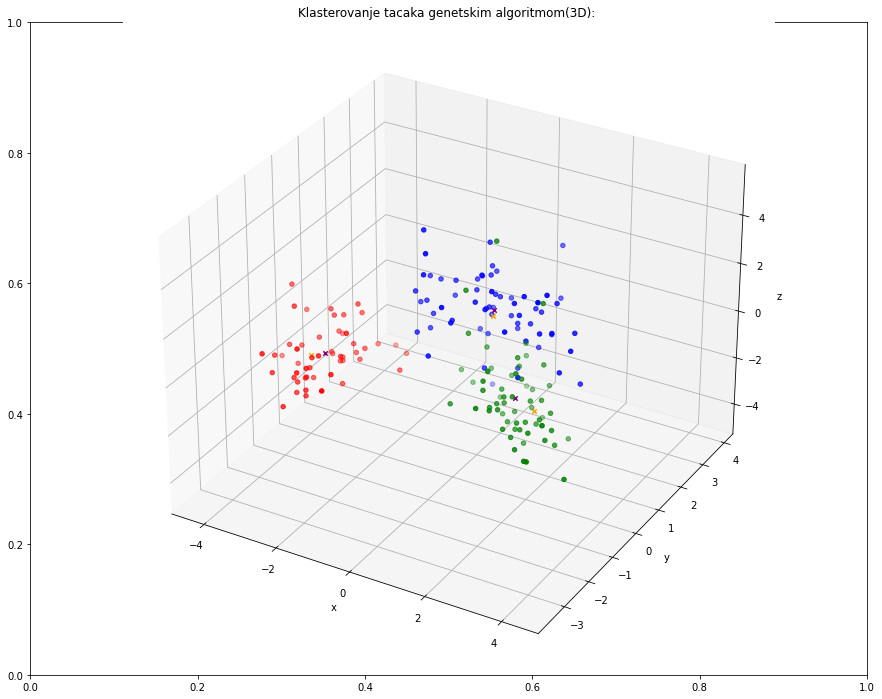

In [235]:
fig,ax=plt.subplots(figsize=(15,12))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax = fig.add_subplot(1, 3, 1, projection='3d')
for label in range(num_clusters):
    cluster = X_pca[X_pca['kmlabel'] == label]
    ax.scatter(cluster['pca_0'],cluster['pca_1'],cluster['pca_2'],c=colors[label])

#ax = fig.add_subplot(1, 3, 2, projection='3d')
centers = pd.DataFrame(cluster_centers, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centers['pca_0'], centers['pca_1'],centers['pca_2'], c='orange',marker='x',depthshade=False)


#ax = fig.add_subplot(1, 3, 3, projection='3d')
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

plt.show()

In [236]:
(model.cluster_centers_).tolist()

[[-2.7200357528457633, -1.1256512605061963, -0.23909324073275157],
 [2.2761935957912294, -0.9320540272411185, 0.0015280315569580689],
 [-0.03695660836803492, 1.7722394457656208, 0.18613872801290696]]

In [237]:
cluster_centers.tolist()

[[-0.1149510930404356, 1.8526112511539847, -0.17128181700039016],
 [2.608268534003198, -0.6353002467730859, -0.6582063088918881],
 [-2.871663347053455, -1.4173085108207923, -0.12515025426804852]]

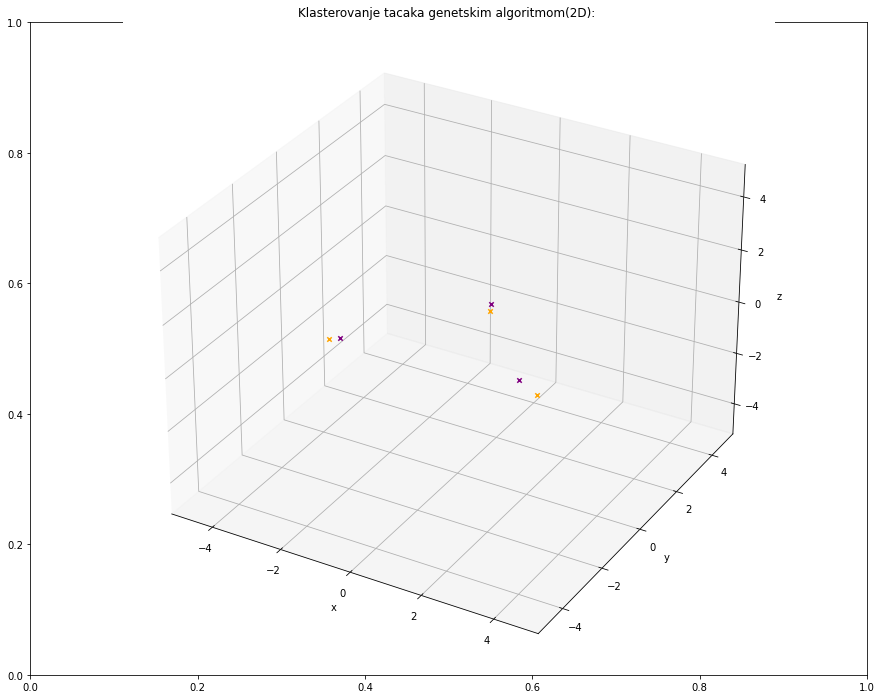

In [238]:
fig,ax=plt.subplots(figsize=(15,12))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
    
centers = pd.DataFrame(cluster_centers, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centers['pca_0'], centers['pca_1'],centers['pca_2'], c='orange',marker='x',depthshade=False)

    
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

ax.set_xlim(-5.0 ,5.0)
ax.set_ylim(-5.0 , 5.0)
ax.set_zlim(-5.0 , 5.0)

plt.show()

# Grafik sa nasim labelama:

In [239]:
X_pca['label'] = labels

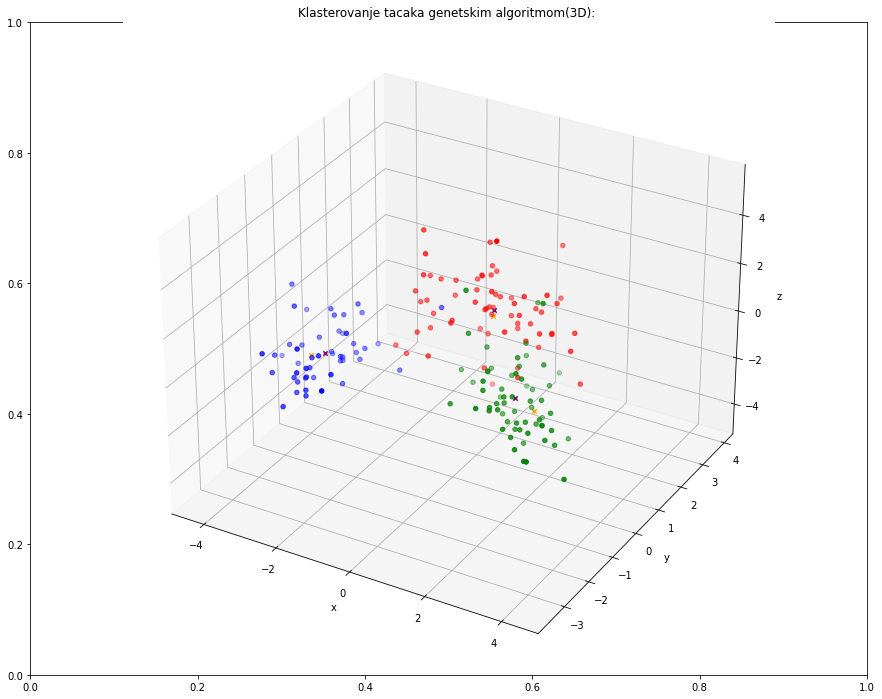

In [240]:
fig,ax=plt.subplots(figsize=(15,12))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax = fig.add_subplot(1, 3, 1, projection='3d')
for label in range(num_clusters):
    cluster = X_pca[X_pca['label'] == label]
    ax.scatter(cluster['pca_0'],cluster['pca_1'],cluster['pca_2'],c=colors[label])

#ax = fig.add_subplot(1, 3, 2, projection='3d')
centers = pd.DataFrame(cluster_centers, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centers['pca_0'], centers['pca_1'],centers['pca_2'], c='orange',marker='x',depthshade=False)

#ax = fig.add_subplot(1, 3, 3, projection='3d')
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

plt.show()